In [1]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt
from pygmid import Lookup as lk

In [2]:
choice = 0  #start from 0
devices = ['nfet_03v3', 'pfet_03v3']
fet = lk('./'+devices[choice]+'.mat')

In [3]:
# sweep variable vectors
l = fet['L']
vgs = fet['VGS']
vds = fet['VDS']
vsb = fet['VSB']

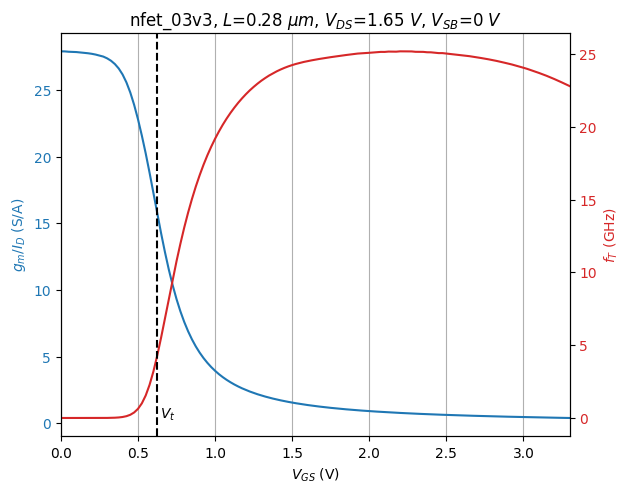

In [4]:
# plot gm/ID and fT versus gate bias
L1 = min(l); VDS1=1.65; VSB1=0
gm_id1 = fet.lookup('GM_ID', L=L1, VDS=VDS1, VSB=VSB1)
ft1 = fet.lookup('GM_CGG', L=L1, VDS=VDS1, VSB=VSB1)/2/np.pi
vt = fet.lookup('VT', L=L1, VGS=1.65, VDS=VDS1, VSB=VSB1)

fig, ax1 = plt.subplots()
ax1.grid(axis='x')
ax1.set_xlabel('$V_{GS}$ (V)')
color = 'tab:blue'
ax1.set_ylabel('$g_m/I_D$ (S/A)', color=color)
ax1.plot(vgs, gm_id1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('$f_T$ (GHz)', color=color)
ax2.plot(vgs, ft1/1e9, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title(devices[choice]+', $L$='+str(L1)+ ' ${\\mu}m$, $V_{DS}$='+str(VDS1)+' $V$, $V_{SB}$='+str(VSB1)+ ' $V$')
plt.xlim(0, 3.3)
plt.axvline(x=vt, color='k', linestyle='--')
plt.text(vt+0.02,0, '$V_t$',rotation=0)
plt.show()
fig.savefig("./plots/techsweep_plots_"+devices[choice]+"_gmID_fT_VGS.png",bbox_inches='tight')

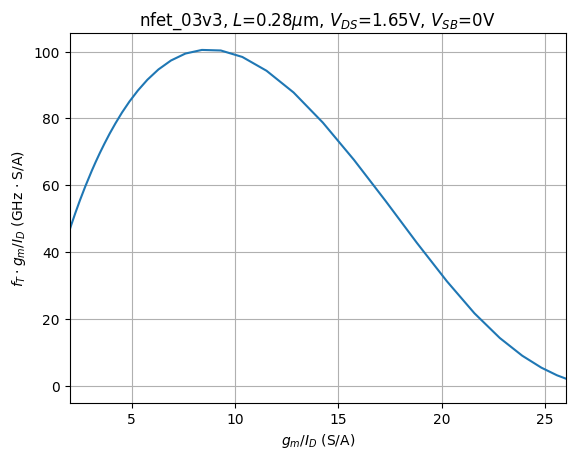

In [5]:
# plot product of gm/ID ant fT versus gm/ID
fig, ax1 = plt.subplots()
plt.plot(gm_id1, gm_id1*ft1/1e9)
plt.xlim(2, 26)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T\\cdot g_m/I_D$ (GHz $\\cdot$ S/A)')
plt.title(devices[choice]+', $L$='+str(L1)+'$\\mu$m, $V_{DS}$='+str(VDS1)+r'V, $V_{SB}$='+str(VSB1)+'V')
plt.grid()
plt.show()
fig.savefig("./plots/techsweep_plots_"+devices[choice]+"_fTgmID_gmID.png",bbox_inches='tight')

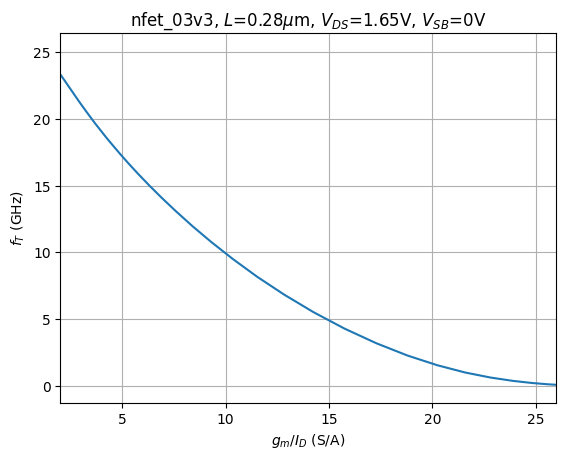

In [6]:
# plot fT versus gm/ID
plt.plot(gm_id1, ft1/1e9)
plt.xlim(2, 26)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $L$='+str(L1)+'$\\mu$m, $V_{DS}$='+str(VDS1)+r'V, $V_{SB}$='+str(VSB1)+'V')
plt.grid()
plt.show()
fig.savefig("./plots/techsweep_plots_"+devices[choice]+"_one_fT_gmID.png",bbox_inches='tight')

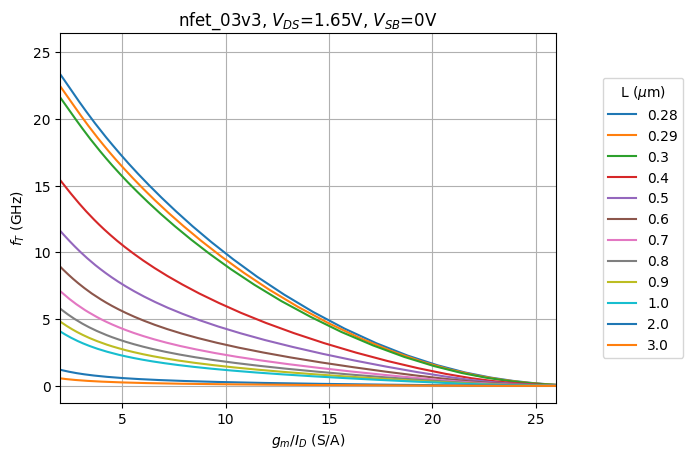

In [7]:
# plot fT versus gm/ID for all L
VDS2=0.9; VSB2=0
gm_id2 = fet.lookup('GM_ID', L=l, VDS=VDS1, VSB=VSB1)
ft2 = fet.lookup('GM_CGG', L=l, VDS=VDS1, VSB=VSB1)/2/np.pi

fig, ax = plt.subplots()
ax.plot(gm_id2.transpose(), ft2.transpose()/1e9)
ax.legend(loc='center right', bbox_to_anchor=(1.27, 0.5), title='L ($\\mu$m)', labels=l.tolist())
plt.xlim(2, 26)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$f_T$ (GHz)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+r'V, $V_{SB}$='+str(VSB1)+'V')
plt.grid()
plt.show()
fig.savefig("./plots/techsweep_plots_"+devices[choice]+"_fT_gmID.png",bbox_inches='tight')

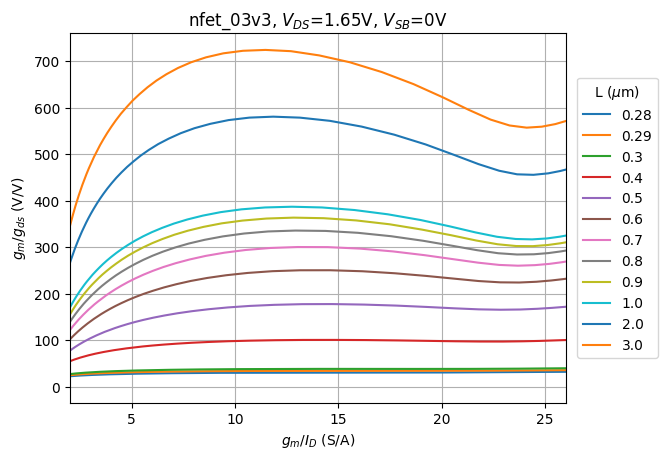

In [8]:
# plot gm/gds versus gm/ID for all L
gm_gds2 = fet.lookup('GM_GDS', L=l, VDS=VDS1, VSB=VSB1)

fig, ax = plt.subplots()
ax.plot(gm_id2.transpose(), gm_gds2.transpose())
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L ($\\mu$m)', labels=l.tolist())
plt.xlim(2, 26)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$g_m/g_{ds}$ (V/V)')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+r'V, $V_{SB}$='+str(VSB1)+'V')
plt.grid()
plt.show()
fig.savefig("./plots/techsweep_plots_"+devices[choice]+"_gm_over_gds_gmID.png",bbox_inches='tight')

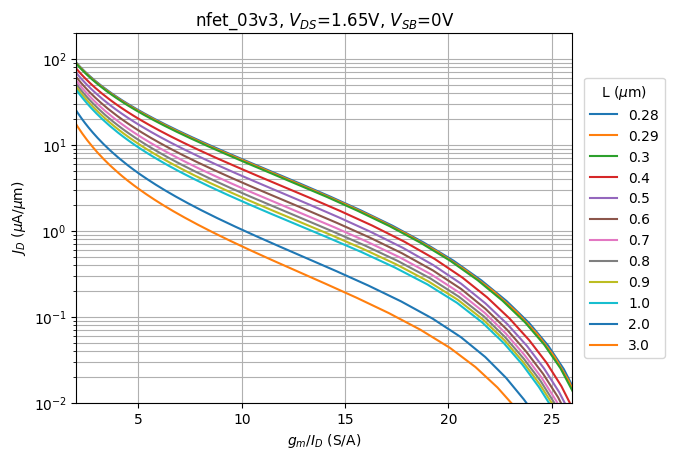

In [9]:
# plot jd versus gm/ID for all L
jd2 = fet.lookup('ID_W', L=l, VDS=VDS1, VSB=VSB1)/1e-6

fig, ax = plt.subplots()
ax.semilogy(gm_id2.transpose(), jd2.transpose())
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L ($\\mu$m)', labels=l.tolist())
plt.xlim(2, 26)
plt.ylim(0.01, 200)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$J_D$ ($\\mu$A/$\\mu$m)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+r'V, $V_{SB}$='+str(VSB1)+'V')
plt.show()
fig.savefig("./plots/techsweep_plots_"+devices[choice]+"_JD_gmID.png",bbox_inches='tight')

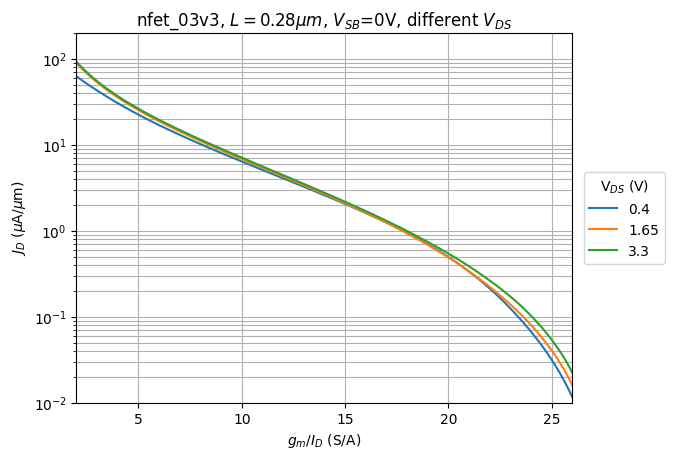

In [10]:
# plot jd versus gm/ID at minimum L for various VDS

gm_id = np.arange(2,26+0.1,0.1)
vds = [0.4, 1.65, 3.3]
jd2 = fet.lookup('ID_W', GM_ID = gm_id, L=L1, VDS=vds, VSB=VSB1)/1e-6

fig, ax = plt.subplots()
ax.semilogy(gm_id, jd2.transpose())
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='V$_{DS}$'+' (V)', labels=vds)
plt.xlim(2, 26)
plt.ylim(0.01, 200)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('$J_D$ ($\\mu$A/$\\mu$m)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $L=$'+str(L1)+ '${\\mu}m$, $V_{SB}$='+str(VSB1)+'V,' ' different $V_{DS}$')
plt.show()
fig.savefig("./plots/techsweep_plots_"+devices[choice]+"_JD_gmID_VDS.png",bbox_inches='tight')

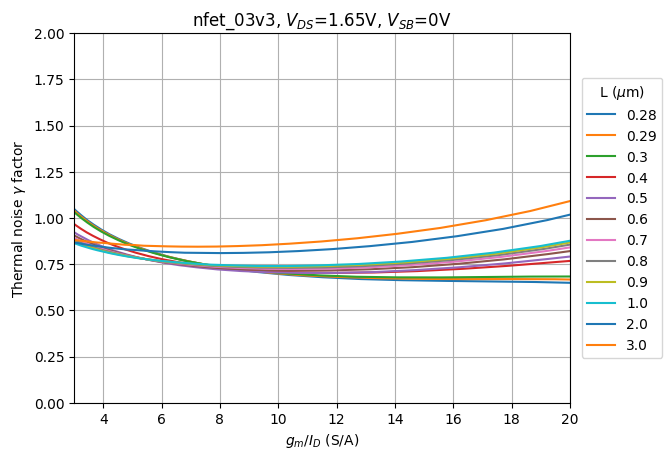

In [11]:
# plot gamma versus gm/ID for all L
gamma = fet.lookup('STH_GM', L=l, VDS=VDS1, VSB=VSB1) / (4*sc.Boltzmann*300)

fig, ax = plt.subplots()
ax.plot(gm_id2.transpose(), gamma.transpose())
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L ($\\mu$m)', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(0, 2)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('Thermal noise $\\gamma$ factor')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+r'V, $V_{SB}$='+str(VSB1)+'V')
plt.show()

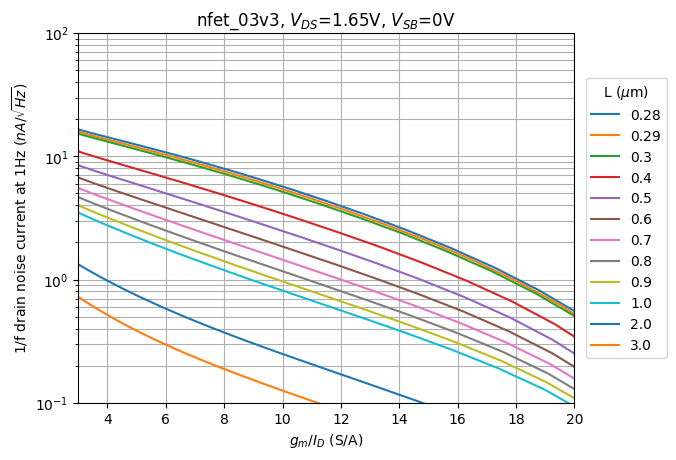

In [12]:
# plot flicker noise drain current at 1Hz versus gm/ID for all L
sfl = fet.lookup('SFL', L=l, VDS=VDS1, VSB=VSB1)**0.5

fig, ax = plt.subplots()
ax.semilogy(gm_id2.transpose(), sfl.transpose()/1e-9)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L ($\\mu$m)', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(0.1, 100)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('1/f drain noise current at 1Hz ($nA/ \\sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+r'V, $V_{SB}$='+str(VSB1)+'V')
plt.show()

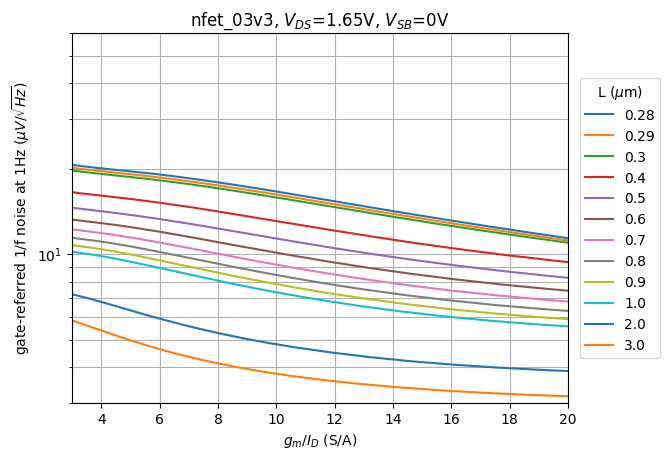

In [13]:
# plot gate-referred 1/f noise at 1Hz versus gm/ID for all L
sfl_gate = fet.lookup('SFL', L=l, VDS=VDS1, VSB=VSB1)**0.5 / fet.lookup('GM', L=l, VDS=VDS1, VSB=VSB1)

fig, ax = plt.subplots()
ax.semilogy(gm_id2.transpose(), sfl_gate.transpose()/1e-6)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L ($\\mu$m)', labels=l.tolist())
plt.xlim(3, 20)
plt.ylim(3, 60)
plt.xlabel('$g_m/I_D$ (S/A)')
plt.ylabel('gate-referred 1/f noise at 1Hz ($\\mu V/ \\sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+', $V_{DS}$='+str(VDS1)+r'V, $V_{SB}$='+str(VSB1)+'V')
plt.show()